In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import Sequential
from tensorflow.keras.metrics import F1Score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay 
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
df_train = pd.read_csv("../Data/Train.csv", index_col=0)
df_val = pd.read_csv("../Data/Test.csv", index_col=0)

In [3]:
df_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.97947,0.463812,0.374437,0.378025,0.145534,0.211876,-1.513639,-0.120963,-0.050907,-0.885320,0.510405,0.965312,1.666965,-1.649821,1.125396,0.050004,3
1,-1.02096,0.463812,-2.670680,0.378025,0.145534,0.211876,0.646890,1.109698,1.965849,-0.566264,-0.525460,1.077507,0.396407,-0.026192,-0.007113,-1.090236,5
2,0.97947,0.463812,0.374437,0.378025,0.145534,0.211876,0.646890,-0.120963,-0.361178,0.603606,1.137376,-1.166375,0.396407,-0.026192,0.806878,0.177803,3
3,-1.02096,0.463812,0.374437,-2.769095,0.145534,0.211876,-1.513639,-0.120963,0.879903,-0.991672,-1.426947,-0.680201,1.551460,-0.026192,-0.219459,-1.090236,0
4,0.97947,0.463812,0.374437,0.378025,0.145534,0.211876,-1.513639,1.109698,-1.136853,1.348068,-1.066429,0.292148,1.538626,-0.026192,1.172584,-0.336715,0


In [5]:
scaler = pickle.load(open('../tools/scaler.sav', 'rb'))
targ_enc = pickle.load(open('../tools/targ_enc.sav', 'rb'))
class_weights = pickle.load(open('../tools/class_weights.sav', 'rb'))

In [6]:
X_train = df_train.copy()
y_train= X_train.pop("NObeyesdad")

X_val = df_val.copy()
y_val= X_val.pop("NObeyesdad")

In [20]:
model = Sequential()
model.add(InputLayer(shape=(X_train.shape[1],)))
model.add(Dense(72, activation='relu', bias_regularizer=L2(0.1)))
model.add(Dropout(0.35))
model.add(Dense(7, activation ='softmax'))
model.compile(optimizer=Adam(learning_rate = 1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, epochs=150, validation_data = [X_val, y_val], shuffle=True, class_weight=class_weights)

Epoch 1/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2434 - loss: 1.9125 - val_accuracy: 0.4846 - val_loss: 1.5590
Epoch 2/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4190 - loss: 1.5544 - val_accuracy: 0.6005 - val_loss: 1.3379
Epoch 3/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5426 - loss: 1.3416 - val_accuracy: 0.6288 - val_loss: 1.1964
Epoch 4/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5718 - loss: 1.2100 - val_accuracy: 0.6501 - val_loss: 1.0956
Epoch 5/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6431 - loss: 1.0953 - val_accuracy: 0.6619 - val_loss: 1.0219
Epoch 6/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6621 - loss: 1.0215 - val_accuracy: 0.6879 - val_loss: 0.9620
Epoch 7/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6641 - loss: 0.9989 - val_accuracy: 0.6998 - val_loss: 0.9173
Epoch 8/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6826 - loss: 0.9676 - val_accuracy: 0.7163 - v

In [54]:
y_val_pred = model.predict(X_val)
classif = classification_report(np.argmax(y_val_pred, axis=1), y_val, output_dict=True)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


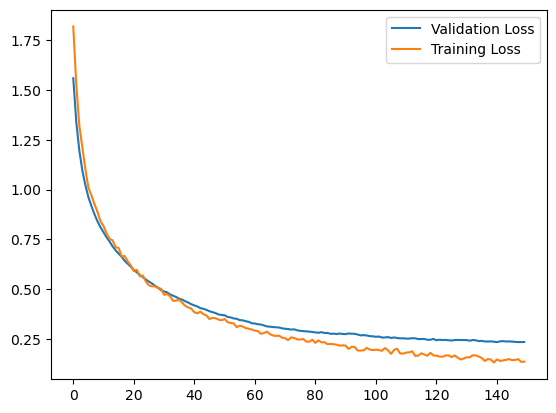

In [26]:
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.legend()
plt.show()

In [30]:
pd.DataFrame(classif).T

,precision,recall,f1-score,support
0,0.944444,0.980769,0.962264,52.000000
1,0.810345,0.824561,0.817391,57.000000
2,0.985714,0.945205,0.965035,73.000000
3,0.966667,0.966667,0.966667,60.000000
4,0.984615,1.000000,0.992248,64.000000
5,0.879310,0.796875,0.836066,64.000000
6,0.896552,0.981132,0.936937,53.000000
accuracy,0.926714,0.926714,0.926714,0.926714
macro avg,0.923950,0.927887,0.925230,423.000000
weighted avg,0.926871,0.926714,0.926114,423.000000


In [35]:
labels = pickle.load(open('../tools/labels.sav', 'rb'))
labels.classes_

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

In [55]:
y_val_pred = np.argmax(y_val_pred, axis=1)
y_val_pred_inv = labels.inverse_transform(y_val_pred)
y_val_inv = labels.inverse_transform(y_val)

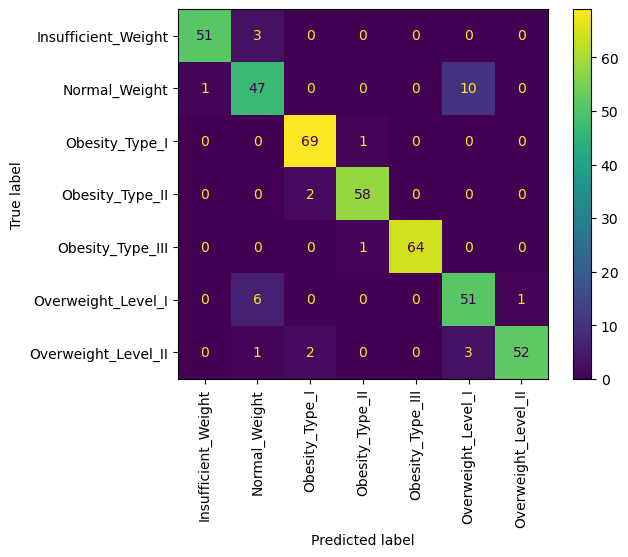

In [57]:
cm = confusion_matrix(y_val_pred_round, y_val)
conf_disp = ConfusionMatrixDisplay.from_predictions(y_val_inv, y_val_pred_inv, xticks_rotation='vertical', labels=labels.classes_)

In [58]:
model.save("../Model/obes_predictor.keras")